# Visualizations - all cases

In [1]:
from policy_epidemic_model_code import *
from jupyterWidgets import *

import numpy as np
import importlib
import matplotlib.pyplot as plt

import pandas as pd
from visualization import *

In [2]:
epidemic_simulators = {}
policy_controls = {}

In [3]:
class Policy_template():
    
    def __init__(self, lockdown_policy_control_days, lockdown_policy_lower_limits,
                 lockdown_policy_upper_limits, testing_policy_control_days, testing_policy_lower_limits,
                 testing_policy_upper_limits):
        self.lockdown_policy_control_days = lockdown_policy_control_days
        self.lockdown_policy_lower_limits = lockdown_policy_lower_limits
        self.lockdown_policy_upper_limits = lockdown_policy_upper_limits
        self.testing_policy_control_days = testing_policy_control_days
        self.testing_policy_lower_limits = testing_policy_lower_limits
        self.testing_policy_upper_limits = testing_policy_upper_limits
        
class Policy():
    def __init__(self, lockdown_policy, testing_policy):
        self.lockdown_policy = lockdown_policy
        self.testing_policy = testing_policy
            

In [4]:
# Tools for building optimization runs based on params.

def create_sub_policy(policy_control_times, policy_control_values):
    # creates a subpolicy (e.g. testing policy) that can be used as part of total policy (all controls)
    
    sub_policy = {} # this will hold the policy in format suitable for input to the epidemic model
    #print("times: ", policy_control_times)
    #print("values: ", policy_control_values)
            
    for (i, t) in enumerate(policy_control_times):
        sub_policy[t] = policy_control_values[i]
        
    return sub_policy

def create_policy(lockdown_policy, testing_policy):

    return Policy(lockdown_policy, testing_policy)

# Run generator

# NOTE: default values for all adjustable run parameters defined in function definition below:
def create_simu_run(ksi_base=0,
    A_rel=0.5, 
    r_AP=0,
    r_U=0.98,
    d_vaccine=500,
    rel_rho=1.0,
    delta_param = 5,
    omegaR_param = 14,
    gamma_param = 180,
    pii_D=0.01,
    R_0=2.5,
    rel_lambda_param=0.5, 
    initial_infect=300,
    testing_rate=0.0,
    testing_sensitivity = 1.0,
    testing_specificity = 1.0,
    tau_TT = 0.0,
    eta = 0.0,
    unknown_q_rate = 0.0,
    recovered_q_rate = 0.0,
    negative_q_rate = 0.0,
    positive_q_rate = 0.999,
    testing_cost=100,
    pop_size=28,
    n_offsprings=14,
    #sampling=get_sampling("real_random"),
    #crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    #mutation=get_mutation("real_pm", eta=15),
    #eliminate_duplicates=True,
    #filename = "foo",
    #termination = get_termination("n_gen", 100),
    lockdown_policy_control_days = [1, 15, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
    lockdown_policy_lower_limits = list(0.5*np.ones(15)), # can't use len(l_p_c_d) within function param def
    lockdown_policy_upper_limits = list(1.0*np.ones(15)), # needs to be different from lower limit
    testing_policy_control_days = [1, 15, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
    testing_policy_lower_limits = list(np.zeros(15)),
    testing_policy_upper_limits = list(0.2*np.ones(15))
              ):
    
    
    model = optimizable_corona_model(ksi_base, A_rel, r_AP, d_vaccine, rel_rho, delta_param, \
                 omegaR_param, pii_D, R_0, rel_lambda_param, initial_infect, testing_cost, eta, gamma_param)
    
    model_case = {
        'tau_paramA'            : testing_rate,
        'test_sens'     : testing_sensitivity,
        'test_spec'     : testing_specificity,
        'tau_TT'        : tau_TT,
        'ksi_U'           : (1+unknown_q_rate)**(1./model.Delta_time)-1,
        'ksi_P'           : (1+positive_q_rate)**(1./model.Delta_time)-1,
        'ksi_N'           : (1+negative_q_rate)**(1./model.Delta_time)-1,
        'ksi_R'           : (1+recovered_q_rate)**(1./model.Delta_time)-1,
        'r_U'           : r_U, # release of unknown Q's | should be redundant!
        'r_P'           : (1+0.98)**(1./model.Delta_time)-1,
        'r_AP'          : 0.0,
        'r_N'           : (1+0.98)**(1./model.Delta_time)-1,
        'r_R'           : (1+0.999)**(1./model.Delta_time)-1,
        'd_start_exp': 0.,
        'experiment': "baseline_vaccine_tag"
    }
    
    policy_control = Policy_template(lockdown_policy_control_days, lockdown_policy_lower_limits,
                 lockdown_policy_upper_limits, testing_policy_control_days, testing_policy_lower_limits,
                 testing_policy_upper_limits)
    
   
    return model, model_case, policy_control
    

In [23]:
runs = {}

runs['base_case_no_control']={
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05],
    'lockdown_policy_control_days': [10000],   # no adjustments to testing policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
}

runs['base_case_no_control_R0_4.0']={
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05],
    'lockdown_policy_control_days': [10000],   # no adjustments to testing policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'R_0': 4.0
}
### ROMER CASE SCENARIOS ###
#------------------------------------------#

runs['romer']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05]
}

#------------------------------------------#

runs['romer_R0_4.0']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'R_0': 4.0, # set R0 to a higher value
}

runs['romer_R0_1.25']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'R_0': 1.25, # set R0 to a higher value
}

# #------------------------------------------#

runs['romer_R0_4.0_sens_spec_075']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_sensitivity': 0.75,
    'testing_specificity': 0.75,
    'R_0': 4.0, # set R0 to a higher value
}


runs['romer_R0_4.0_sens_spec_085']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_sensitivity': 0.85,
    'testing_specificity': 0.85,
    'R_0': 4.0, # set R0 to a higher value
}

runs['romer_R0_4.0_sens_spec_090']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_sensitivity': 0.90,
    'testing_specificity': 0.90,
    'R_0': 4.0, # set R0 to a higher value
}

runs['romer_R0_4.0_sens_spec_095']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_sensitivity': 0.95,
    'testing_specificity': 0.95,
    'R_0': 4.0, # set R0 to a higher value
}
#------------------------------------------#

runs['romer_6d_incubation']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'delta_param': 6
}

#------------------------------------------#

runs['romer_8d_incubation']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'delta_param': 8
}

#------------------------------------------#

runs['romer_8d_incubation_sens_spec_075']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'delta_param': 8,
    'testing_sensitivity': 0.75,
    'testing_specificity': 0.75
}

#------------------------------------------#

runs['romer_8d_incubation_sens_spec_090']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'delta_param': 8,
    'testing_sensitivity': 0.75,
    'testing_specificity': 0.75
}


runs['romer_3d_delay']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_policy_control_days': [3, 15, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
}

runs['romer_7d_delay']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_policy_control_days': [7, 15, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
}

runs['romer_14d_delay']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_policy_control_days': [14, 15, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
}

runs['romer_28d_delay']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_policy_control_days': [28, 29, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
}

runs['romer_sens_075']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_sensitivity': 0.75,
}

runs['romer_spec_075']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_specificity': 0.75,
}

runs['romer_sens_spec_075']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_sensitivity': 0.75,
    'testing_specificity': 0.75,
}

#------------------------------------------#

runs['romer_sens_spec_085']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_sensitivity': 0.85,
    'testing_specificity': 0.85,
}

#------------------------------------------#

runs['romer_sens_spec_090']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_sensitivity': 0.90,
    'testing_specificity': 0.90,
}

#------------------------------------------#

runs['romer_sens_spec_095']={
    'lockdown_policy_control_days': [10000],   # no adjustments to lockdown policy
    'lockdown_policy_lower_limits': [0.0],
    'lockdown_policy_upper_limits': [0.05],
    'testing_sensitivity': 0.95,
    'testing_specificity': 0.95,
}

#------------------------------------------#


### LOCKDOWN OPTIMIZATION CASE SCENARIOS ###

#------------------------------------------#

runs['base_case_lockdown_opt']={
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

#------------------------------------------#

runs['base_case_lockdown_opt_R0_4.0']={
    'R_0': 4.0,
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

#------------------------------------------#

runs['base_case_lockdown_opt_with_limited_general_testing']={
    'testing_rate': 0.005,
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

#------------------------------------------#

runs['base_case_lockdown_opt_with_limited_imperfect(0.75)_general_testing']={
    'testing_rate': 0.005,
    'testing_sensitivity': 0.75,
    'testing_specificity': 0.75,
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

runs['base_case_lockdown_opt_with_limited_sens075_general_testing']={
    'testing_rate': 0.005,
    'testing_sensitivity': 0.75,
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

runs['base_case_lockdown_opt_with_limited_spec075_general_testing']={
    'testing_rate': 0.005,
    'testing_specificity': 0.75,
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

runs['base_case_lockdown_opt_with_limited_sens090_general_testing']={
    'testing_rate': 0.005,
    'testing_sensitivity': 0.90,
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

runs['base_case_lockdown_opt_with_limited_spec090_general_testing']={
    'testing_rate': 0.005,
    'testing_specificity': 0.90,
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}



runs['base_case_lockdown_opt_with_limited_imperfect(0.85)_general_testing']={
    'testing_rate': 0.005,
    'testing_sensitivity': 0.85,
    'testing_specificity': 0.85,
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}
runs['base_case_lockdown_opt_with_limited_imperfect(0.90)_general_testing']={
    'testing_rate': 0.005,
    'testing_sensitivity': 0.90,
    'testing_specificity': 0.90,
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}
runs['base_case_lockdown_opt_with_limited_imperfect(0.95)_general_testing']={
    'testing_rate': 0.005,
    'testing_sensitivity': 0.95,
    'testing_specificity': 0.95,
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}
#------------------------------------------#

runs['base_case_lockdown_opt_3d_delay']={
    'lockdown_policy_control_days': [3, 15, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

runs['base_case_lockdown_opt_7d_delay']={
    'lockdown_policy_control_days': [7, 15, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

runs['base_case_lockdown_opt_14d_delay']={
    'lockdown_policy_control_days': [14, 15, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

runs['base_case_lockdown_opt_28d_delay']={
    'lockdown_policy_control_days': [28, 29, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

runs['base_case_6d_incubation']={
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05],
    'delta_param': 6,
}


runs['base_case_8d_incubation']={
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05],
    'delta_param': 8,
}

##### TEST and TRACE CASES #####


# Fixed testing rate:


runs['test_and_trace_lockdown_opt_eta75']={
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05],
    'eta': 0.75
}

runs['test_and_trace_lockdown_opt_eta95']={
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05],
    'eta': 0.95
}

runs['test_and_trace_lockdown_opt_eta50']={
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05],
    'eta': 0.50
}

runs['test_and_trace_lockdown_opt_eta100']={
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05],
    'eta': 1.00
}

runs['test_and_trace_lockdown_opt_eta75_R04']={
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05],
    'eta': 0.75,
    'R_0': 4.0
}



In [5]:
runs = {}

runs['base_case_lockdown_opt_3d_delay']={
    'lockdown_policy_control_days': [3, 15, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}

runs['base_case_lockdown_opt_7d_delay']={
    'lockdown_policy_control_days': [7, 15, 30, 60, 90, 120, 150, 200, 250, 300, 350, 400, 450, 500, 600],
    'testing_policy_control_days': [10000],   # no adjustments to testing policy
    'testing_policy_lower_limits': [0.0],
    'testing_policy_upper_limits': [0.05]
}


In [6]:
for run in runs:
    model, model_case, policy_control = create_simu_run(**runs[run])

    epidemic_simulators[run] = (model, model_case)
    policy_controls[run] = policy_control

In [9]:
lowest_deaths_policy_values = {}
lowest_deaths_policies = {}
best_output_policy_values = {}
best_output_policies = {}
most_smooth_policy_values = {}
most_smooth_policies = {}
lowest_deaths_obj = {}
best_output_obj = {}
best_output_run_data = {}
lowest_deaths_run_data = {}
most_smooth_policy_run_data = {}
no_control_runs = ['base_case_no_control', 'base_case_no_control_R0_4.0', 'base_case_no_control_high_gamma', 'base_case_no_control_BMH_rpl']
no_control_policy = Policy({10000: 0}, {10000: 0})
no_control_run_data = {}

for run in runs:
    if run in no_control_runs:
        no_control_run_data[run] = epidemic_simulators[run][0].solve_case(epidemic_simulators[run][1], no_control_policy)
    else:
        run_obj_df = pd.read_csv('active_results/'+run+'_objectives.csv', delimiter=',')
        run_policies_df = pd.read_csv('active_results/'+run+'_results.csv', delimiter=',')
        run_obj = run_obj_df.to_numpy()
        run_policies = run_policies_df.to_numpy()
    
    
        lowest_deaths_policy_values[run] = run_policies[np.argmin(run_obj[:,0]), :]
        lowest_deaths_obj[run] = run_obj[np.argmin(run_obj[:,0]), :]
        best_output_policy_values[run] = run_policies[np.argmin(run_obj[:,1]), :] # min because of -1 multiplier
        best_output_obj[run] = run_obj[np.argmin(run_obj[:,1]), :]

        best_output_run_ld_policy = create_sub_policy(policy_controls[run].lockdown_policy_control_days, best_output_policy_values[run][0:len(policy_controls[run].lockdown_policy_control_days)])
        best_output_run_test_policy = create_sub_policy(policy_controls[run].testing_policy_control_days, best_output_policy_values[run][len(policy_controls[run].lockdown_policy_control_days):len(best_output_policy_values[run])])
        best_output_policies[run] = create_policy(best_output_run_ld_policy, best_output_run_test_policy)
        
        best_output_run_data[run] = epidemic_simulators[run][0].solve_case(epidemic_simulators[run][1], best_output_policies[run] )

        lowest_deaths_run_ld_policy = create_sub_policy(policy_controls[run].lockdown_policy_control_days, lowest_deaths_policy_values[run][0:len(policy_controls[run].lockdown_policy_control_days)])
        lowest_deaths_run_test_policy = create_sub_policy(policy_controls[run].testing_policy_control_days, lowest_deaths_policy_values[run][len(policy_controls[run].lockdown_policy_control_days):len(lowest_deaths_policy_values[run])])
        lowest_deaths_policies[run] = create_policy(lowest_deaths_run_ld_policy, lowest_deaths_run_test_policy)
        
        lowest_deaths_run_data[run] = epidemic_simulators[run][0].solve_case(epidemic_simulators[run][1], lowest_deaths_policies[run])

        # Smoothest policy (least change between consecutive policy steps)
        change_measure = np.zeros(len(run_policies[:,1]))
        for p in range(1,len(run_policies[:,1])):
            for s, v in enumerate(run_policies[p,1:len(run_policies[p,:])]):
                change_measure[p] += abs(v-run_policies[p,s-1])
            #print("change measure: ", change_measure)
        most_smooth_policy_values[run] = run_policies[np.argmin(change_measure),:]
        most_smooth_ld_policy = create_sub_policy(policy_controls[run].lockdown_policy_control_days, most_smooth_policy_values[run][0:len(policy_controls[run].lockdown_policy_control_days)])
        most_smooth_test_policy = create_sub_policy(policy_controls[run].testing_policy_control_days, most_smooth_policy_values[run][len(policy_controls[run].lockdown_policy_control_days):len(lowest_deaths_policy_values[run])])
        most_smooth_policies[run] = create_policy(most_smooth_ld_policy, most_smooth_test_policy)
        
        most_smooth_policy_run_data[run] = epidemic_simulators[run][0].solve_case(epidemic_simulators[run][1], most_smooth_policies[run])

print("Done.")

Done.


In [8]:
print(lowest_deaths_policy)

{}


/Users/ljneuvon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



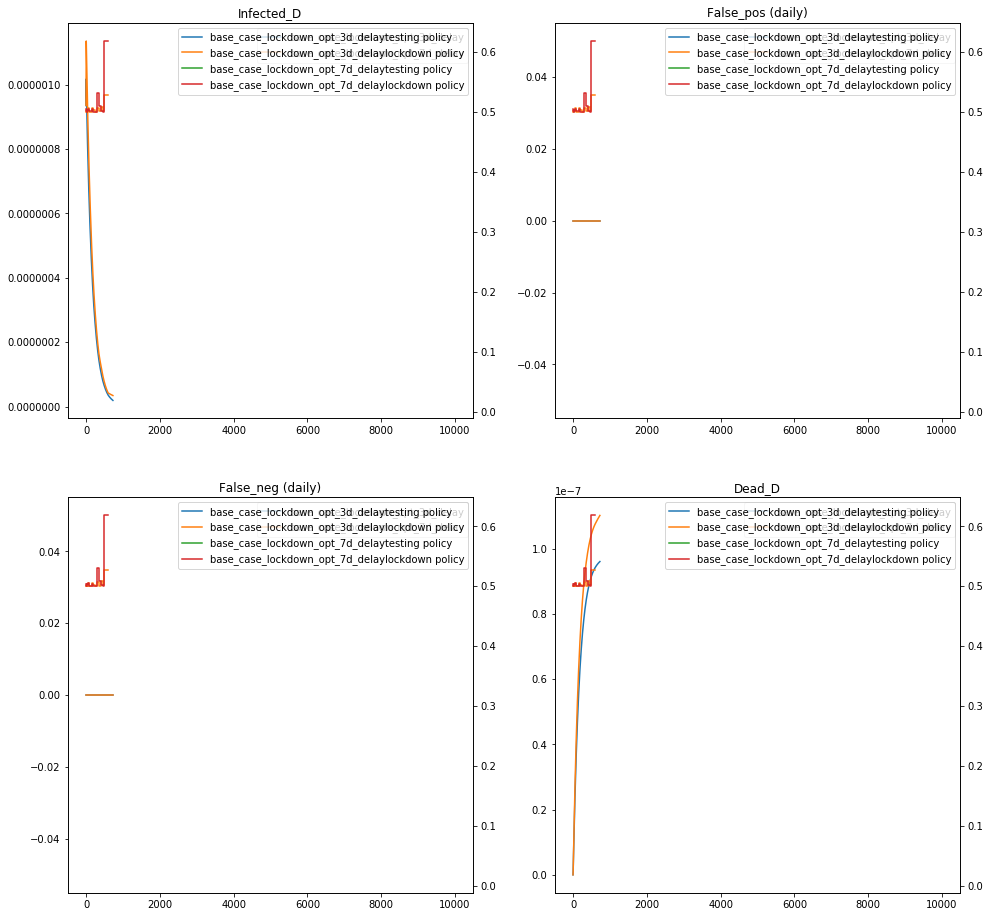

In [11]:
fig = epidemic_progression_plot([3, 4, 5, 7], epidemic_simulators, lowest_deaths_run_data, columns=2, policies=lowest_deaths_policies)
fig.show()

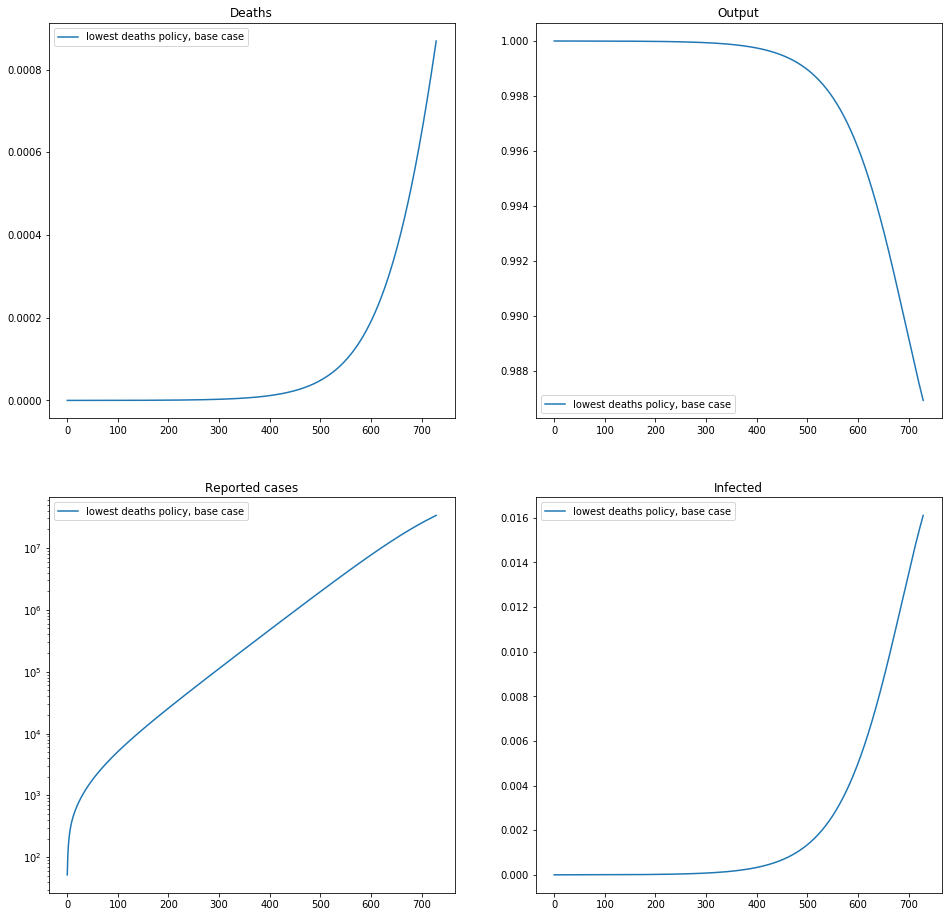

In [24]:
# base case check
time_steps = range(0, epidemic_simulators['base_case_no_control'][0].T_years*365)
plt.figure(figsize=(16,16))
'base_case_no_control'
plt.subplot(221)
plt.plot(time_steps, lowest_deaths_run_data['base_case_no_control'][7])

plt.title("Deaths")
plt.legend(['lowest deaths policy, base case', 'lowest deaths policy, R0=4.0', 'lowest deaths policy, R0=4.0, imperf. test'])

plt.subplot(222)
plt.plot(time_steps, lowest_deaths_run_data['base_case_no_control'][11])

plt.title("Output")
plt.legend(['lowest deaths policy, base case', 'lowest deaths policy, R0=4.0', 'lowest deaths policy, R0=4.0, imperf. test'])

plt.subplot(223)
plt.yscale('log')
plt.plot(time_steps, lowest_deaths_run_data['base_case_no_control'][0])

plt.title("Reported cases")
plt.legend(['lowest deaths policy, base case', 'lowest deaths policy, R0=4.0', 'lowest deaths policy, R0=4.0, imperf. test'])

plt.subplot(224)
plt.plot(time_steps, lowest_deaths_run_data['base_case_no_control'][3])

plt.title("Infected")
#plt.legend(['lowest deaths policy, base case', 'highest output policy, base case', 'lowest deaths policy, R0=4.0', 'highest output policy, R0=4.0', 'lowest deaths policy, R0=4.0, imperf. test', 'highest output policy, R0=4.0, imperf. test' ])
plt.legend(['lowest deaths policy, base case', 'lowest deaths policy, R0=4.0', 'lowest deaths policy, R0=4.0, imperf. test'])

plt.savefig("active_results/base_case_non_control.png", dpi=150)
#plt.tight_layout()
plt.show()

# Results

## Pick interesting population members from result population

Picks the lowest deaths, lowest output loss and intermediate population members

Indices for solve_case return values ('D' suffix  = Daily):
0: Reported_D,   
1: Notinfected_D,   
2: Unreported_D,   
3: Infected_D,   
4: False_pos (daily),   
5: False_neg (daily),   
6: Recovered_D,   
7: Dead_D,   
8: Infected_T (time step),   
9: Infected_not_Q,   
10: Infected_in_Q,   
11: Y_D,   
12: M_t,   
13: Y_total,   
14: total_cost
15: tests
16: Unknown, not infected, asymptomatic, not quarantined
17: Unknown, not infected, asymptomatic, quarantined
18: Known, not infected, asymptomatic, not quarantined
19: Known, not infected, asymptomatic, quarantined



## Romer case (optimize testing without lockdown)

### Effects of imperfect testing:

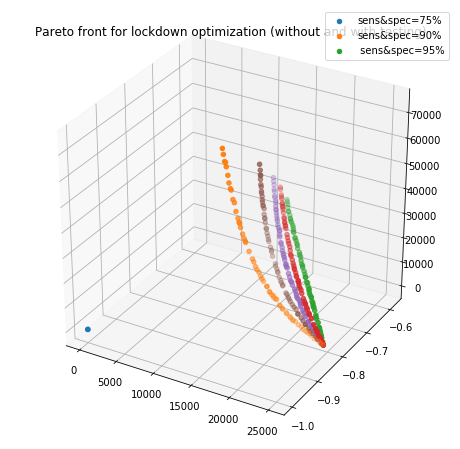

In [86]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
run_obj_df_bc = pd.read_csv('results/romer_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_pt = pd.read_csv('active_results/romer_R0_4.0_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt75 = pd.read_csv('active_results/romer_R0_4.0_sens_spec_075_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt85 = pd.read_csv('active_results/romer_R0_4.0_sens_spec_085_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt90 = pd.read_csv('active_results/romer_R0_4.0_sens_spec_090_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt95 = pd.read_csv('active_results/romer_R0_4.0_sens_spec_095_objectives.csv', delimiter=',').to_numpy()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(run_obj_df_bc[:,0], run_obj_df_bc[:,1], run_obj_df_bc[:,2], label="")
ax.scatter(run_obj_df_bc_pt[:,0], run_obj_df_bc_pt[:,1], run_obj_df_bc_pt[:,2])
ax.scatter(run_obj_df_bc_ipt75[:,0], run_obj_df_bc_ipt75[:,1], run_obj_df_bc_ipt75[:,2])
ax.scatter(run_obj_df_bc_ipt85[:,0], run_obj_df_bc_ipt85[:,1], run_obj_df_bc_ipt85[:,2])
ax.scatter(run_obj_df_bc_ipt90[:,0], run_obj_df_bc_ipt90[:,1], run_obj_df_bc_ipt90[:,2])
ax.scatter(run_obj_df_bc_ipt95[:,0], run_obj_df_bc_ipt95[:,1], run_obj_df_bc_ipt95[:,2])

#ax.legend(['R0=4.0', 'sens&spec=75%', 'sens&spec=85%', 'sens&spec=90%',' sens&spec=95%'])
ax.legend()
plt.title("Pareto front for lockdown optimization (without and with testing)")
plt.show()
plt.savefig("active_results/pareto_example.png", dpi=150)



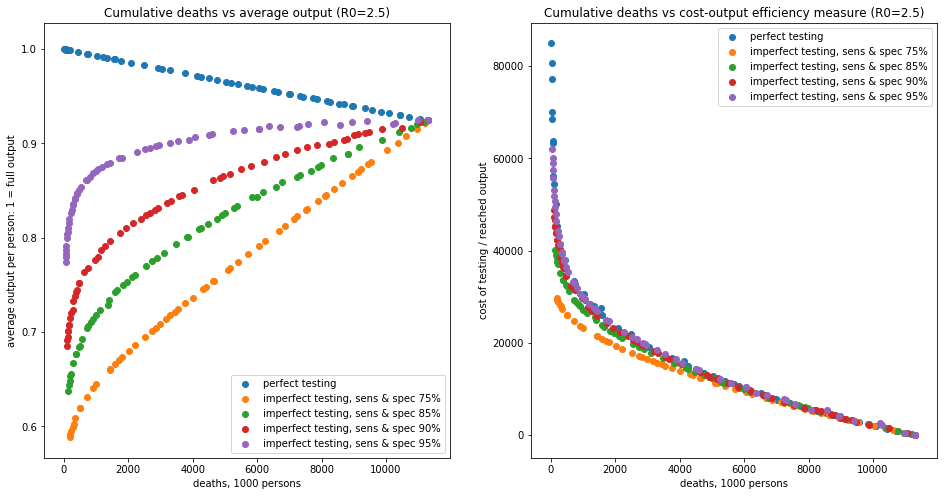

In [17]:
%matplotlib inline
run_obj_df_bc_pt = pd.read_csv('active_results/romer_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt75 = pd.read_csv('active_results/romer_sens_spec_075_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt85 = pd.read_csv('active_results/romer_sens_spec_085_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt90 = pd.read_csv('active_results/romer_sens_spec_090_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt95 = pd.read_csv('active_results/romer_sens_spec_095_objectives.csv', delimiter=',').to_numpy()

fig, axes = plt.subplots(ncols=2, figsize=(16,8))
axes[0].scatter(run_obj_df_bc_pt[:,0], -1*run_obj_df_bc_pt[:,1], label='perfect testing'),
axes[0].scatter(run_obj_df_bc_ipt75[:,0], -1*run_obj_df_bc_ipt75[:,1], label='imperfect testing, sens & spec 75%')
axes[0].scatter(run_obj_df_bc_ipt85[:,0], -1*run_obj_df_bc_ipt85[:,1], label='imperfect testing, sens & spec 85%')
axes[0].scatter(run_obj_df_bc_ipt90[:,0], -1*run_obj_df_bc_ipt90[:,1], label='imperfect testing, sens & spec 90%')
axes[0].scatter(run_obj_df_bc_ipt95[:,0], -1*run_obj_df_bc_ipt95[:,1], label='imperfect testing, sens & spec 95%')
axes[0].set_title('Cumulative deaths vs average output (R0=2.5)')
axes[0].set_xlabel('deaths, 1000 persons')
axes[0].set_ylabel('average output per person: 1 = full output')
#axes[0].set_xlim(0,600)
#axes[0].set_ylim(0.975, 1.00)
axes[0].legend()

axes[1].scatter(run_obj_df_bc_pt[:,0],run_obj_df_bc_pt[:,2], label='perfect testing'),
axes[1].scatter(run_obj_df_bc_ipt75[:,0], run_obj_df_bc_ipt75[:,2], label='imperfect testing, sens & spec 75%')
axes[1].scatter(run_obj_df_bc_ipt85[:,0], run_obj_df_bc_ipt85[:,2], label='imperfect testing, sens & spec 85%')
axes[1].scatter(run_obj_df_bc_ipt90[:,0], run_obj_df_bc_ipt90[:,2], label='imperfect testing, sens & spec 90%')
axes[1].scatter(run_obj_df_bc_ipt95[:,0], run_obj_df_bc_ipt95[:,2], label='imperfect testing, sens & spec 95%')
axes[1].set_title('Cumulative deaths vs cost-output efficiency measure (R0=2.5)')
axes[1].set_xlabel('deaths, 1000 persons')
axes[1].set_ylabel('cost of testing / reached output')
#axes[1].set_xlim(0,600)
#axes[1].set_ylim(60,140)
axes[1].legend()

fig.savefig("active_results/romer_pareto_imp_testing_R0_2.5.png", dpi=150)


### Differences in policies

KeyError: 'romer_sens_spec_85'

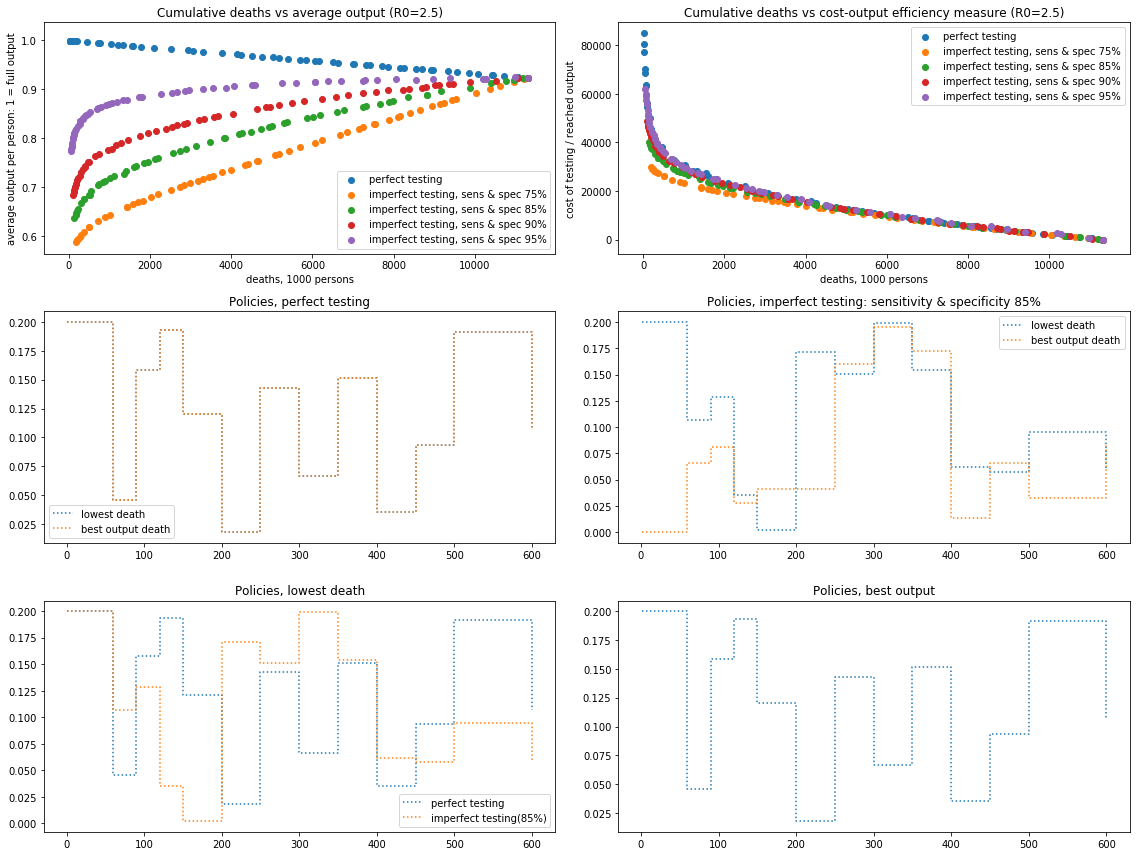

In [92]:
run_obj_df_bc_pt = pd.read_csv('active_results/romer_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt75 = pd.read_csv('active_results/romer_sens_spec_075_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt85 = pd.read_csv('active_results/romer_sens_spec_085_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt90 = pd.read_csv('active_results/romer_sens_spec_090_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_ipt95 = pd.read_csv('active_results/romer_sens_spec_095_objectives.csv', delimiter=',').to_numpy()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,12))
axes[0,0].scatter(run_obj_df_bc_pt[:,0], -1*run_obj_df_bc_pt[:,1], label='perfect testing'),
axes[0,0].scatter(run_obj_df_bc_ipt75[:,0], -1*run_obj_df_bc_ipt75[:,1], label='imperfect testing, sens & spec 75%')
axes[0,0].scatter(run_obj_df_bc_ipt85[:,0], -1*run_obj_df_bc_ipt85[:,1], label='imperfect testing, sens & spec 85%')
axes[0,0].scatter(run_obj_df_bc_ipt90[:,0], -1*run_obj_df_bc_ipt90[:,1], label='imperfect testing, sens & spec 90%')
axes[0,0].scatter(run_obj_df_bc_ipt95[:,0], -1*run_obj_df_bc_ipt95[:,1], label='imperfect testing, sens & spec 95%')
axes[0,0].set_title('Cumulative deaths vs average output (R0=2.5)')
axes[0,0].set_xlabel('deaths, 1000 persons')
axes[0,0].set_ylabel('average output per person: 1 = full output')
#axes[0,0].set_xlim(0,600)
#axes[0,0].set_ylim(0.975, 1.00)
axes[0,0].legend()

axes[0,1].scatter(run_obj_df_bc_pt[:,0],run_obj_df_bc_pt[:,2], label='perfect testing'),
axes[0,1].scatter(run_obj_df_bc_ipt75[:,0], run_obj_df_bc_ipt75[:,2], label='imperfect testing, sens & spec 75%')
axes[0,1].scatter(run_obj_df_bc_ipt85[:,0], run_obj_df_bc_ipt85[:,2], label='imperfect testing, sens & spec 85%')
axes[0,1].scatter(run_obj_df_bc_ipt90[:,0], run_obj_df_bc_ipt90[:,2], label='imperfect testing, sens & spec 90%')
axes[0,1].scatter(run_obj_df_bc_ipt95[:,0], run_obj_df_bc_ipt95[:,2], label='imperfect testing, sens & spec 95%')
axes[0,1].set_title('Cumulative deaths vs cost-output efficiency measure (R0=2.5)')
axes[0,1].set_xlabel('deaths, 1000 persons')
axes[0,1].set_ylabel('cost of testing / reached output')
#axes[0,1].set_xlim(0,600)
#axes[0,1].set_ylim(60,140)
axes[0,1].legend()

axes[1,0].set_title('Policies, perfect testing')
axes[1,0].step(policy_controls['romer'].testing_policy_control_days, lowest_deaths_policy['romer'][1:len(lowest_deaths_policy['romer'])], ':', where='post', label='lowest death'),
axes[1,0].step(policy_controls['romer'].testing_policy_control_days, best_output_policy['romer'][1:len(best_output_policy['romer'])], ':', where='post', label='best output death'),
axes[1,0].legend()

axes[1,1].set_title('Policies, imperfect testing: sensitivity & specificity 85%')
axes[1,1].step(policy_controls['romer_sens_spec_085'].testing_policy_control_days, lowest_deaths_policy['romer_sens_spec_085'][1:len(lowest_deaths_policy['romer_sens_spec_085'])], ':', where='post', label='lowest death'),
axes[1,1].step(policy_controls['romer_sens_spec_085'].testing_policy_control_days, best_output_policy['romer_sens_spec_085'][1:len(best_output_policy['romer_sens_spec_085'])], ':', where='post', label='best output death'),
axes[1,1].legend()
fig.tight_layout()

axes[2,0].set_title('Policies, lowest death')
axes[2,0].step(policy_controls['romer'].testing_policy_control_days, lowest_deaths_policy['romer'][1:len(lowest_deaths_policy['romer'])], ':', where='post', label='perfect testing'),
axes[2,0].step(policy_controls['romer_sens_spec_085'].testing_policy_control_days, lowest_deaths_policy['romer_sens_spec_085'][1:len(lowest_deaths_policy['romer_sens_spec_085'])], ':', where='post', label='imperfect testing(85%)'),
axes[2,0].legend()

axes[2,1].set_title('Policies, best output')
axes[2,1].step(policy_controls['romer'].testing_policy_control_days, best_output_policy['romer'][1:len(best_output_policy['romer'])], ':', where='post', label='perfect testing'),
axes[2,1].step(policy_controls['romer_sens_spec_085'].testing_policy_control_days, best_output_policy['romer_sens_spec_85'][1:len(best_output_policy['romer_sens_spec_085'])], ':', where='post', label='imperfect testing(85%)'),
axes[2,1].legend()
fig.tight_layout()
#fig.savefig("active_results/romer_pareto_imp_testing_R0_4.png", dpi=150)


### Differences compared to no control case

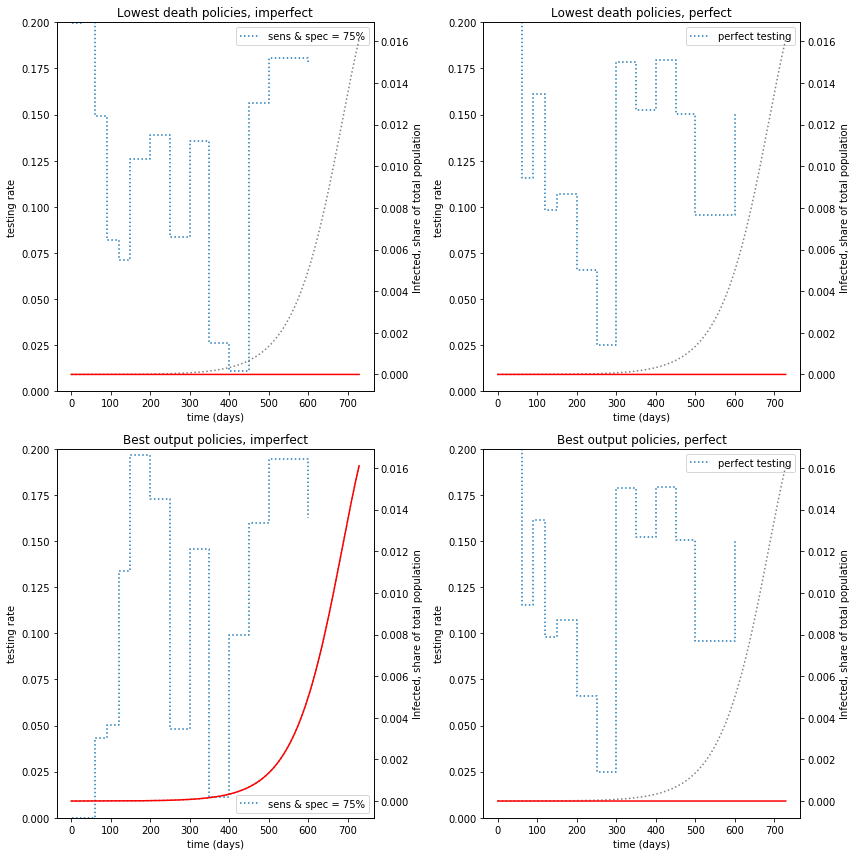

In [18]:
### POLICY PLOTS - ROMER R0=2.5
# max tetst rate 0.2 (!)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

axes[0,0].step(policy_controls['romer_sens_spec_075'].testing_policy_control_days, lowest_deaths_policy['romer_R0_4.0_sens_spec_075'][1:len(lowest_deaths_policy['romer_R0_4.0_sens_spec_075'])], ':', where='post', label='sens & spec = 75%')
axes[0,0].set_title('Lowest death policies, imperfect')
axes[0,0].set_xlabel('time (days)')
axes[0,0].set_ylabel('testing rate')
#axes[0,0].set_xlim(0,600)
axes[0,0].set_ylim(0.0, 0.2)
secaxy00 = axes[0,0].twinx()
secaxy00.plot(lowest_deaths_run_data['base_case_no_control'][3], ':', color='gray', label='base case no control')
secaxy00.plot(lowest_deaths_run_data['romer_sens_spec_075'][3], color='red')
#secaxy00.set_ylim(0.0, 0.025)
secaxy00.set_ylabel('Infected, share of total population')
axes[0,0].legend()

axes[1,0].step(policy_controls['romer_sens_spec_075'].testing_policy_control_days, best_output_policy['romer_R0_4.0_sens_spec_075'][1:len(best_output_policy['romer_R0_4.0_sens_spec_075'])], ':', where='post',label='sens & spec = 75%')
secaxy10 = axes[1,0].twinx()
secaxy10.plot(lowest_deaths_run_data['base_case_no_control'][3], ':', color='gray', label='base case no control')
secaxy10.plot(best_output_run_data['romer_sens_spec_075'][3], color='red')
#secaxy10.set_ylim(0.0, 0.025)
secaxy10.set_ylabel('Infected, share of total population')
axes[1,0].set_title('Best output policies, imperfect')
axes[1,0].set_xlabel('time (days)')
axes[1,0].set_ylabel('testing rate')
#axes[1,0].set_xlim(0,600)
axes[1,0].set_ylim(0.0, 0.2)
axes[1,0].legend()

axes[0,1].step(policy_controls['romer'].testing_policy_control_days, lowest_deaths_policy['romer_R0_4.0'][1:len(lowest_deaths_policy['romer_R0_4.0'])], ':', where='post', label='perfect testing')

axes[0,1].set_title('Lowest death policies, perfect')
axes[0,1].set_xlabel('time (days)')
axes[0,1].set_ylabel('testing rate')
#axes[0,1].set_xlim(0,600)
axes[0,1].set_ylim(0.0, 0.2)
secaxy01 = axes[0,1].twinx()
secaxy01.plot(lowest_deaths_run_data['base_case_no_control'][3], ':', color='gray', label='base case no control')
secaxy01.plot(lowest_deaths_run_data['romer'][3], color='red')
#secaxy01.set_ylim(0.0, 0.025)
secaxy01.set_ylabel('Infected, share of total population')
axes[0,1].legend()


axes[1,1].step(policy_controls['romer'].testing_policy_control_days, best_output_policy['romer_R0_4.0'][1:len(best_output_policy['romer_R0_4.0'])], ':', where='post', label='perfect testing')

axes[1,1].set_title('Best output policies, perfect')
axes[1,1].set_xlabel('time (days)')
axes[1,1].set_ylabel('testing rate')
#axes[1,1].set_xlim(0,600)
axes[1,1].set_ylim(0.0, 0.2)
secaxy11 = axes[1,1].twinx()
secaxy11.plot(lowest_deaths_run_data['base_case_no_control'][3], ':', color='gray', label='base case no control')
secaxy11.plot(best_output_run_data['romer'][3], color='red')
#secaxy11.set_ylim(0.0, 0.025)
secaxy11.set_ylabel('Infected, share of total population')
axes[1,1].legend()


fig.tight_layout()
fig.savefig("results/romer_pareto_imp_testing_policies.png", dpi=150)

### Differences compared to no control case with high R0
$$R_0 = 4.0$$

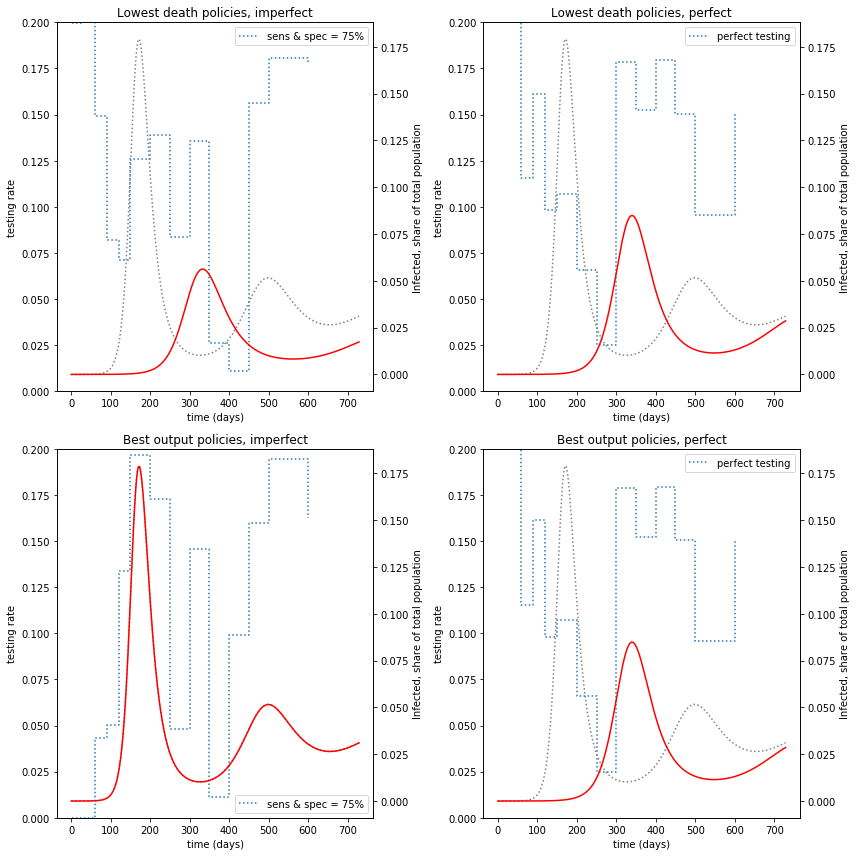

In [29]:
### POLICY PLOTS - ROMER R0=4.0
# max tetst rate 0.2 (!)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

#axes[0].step(problems['romer_R0_4.0'].testing_policy_control_days, lowest_deaths_policy['romer_R0_4.0'][1:len(lowest_deaths_policy['romer_R0_4.0'])], ':', where='post', label='perfect testing'),
#axes[0].step(problems['romer_R0_4.0_sens_spec_090'].testing_policy_control_days, lowest_deaths_policy['romer_R0_4.0_sens_spec_090'][1:len(lowest_deaths_policy['romer_R0_4.0_sens_spec_090'])], ':', where='post', label='sens & spec = 90%'),
axes[0,0].step(policy_controls['romer_R0_4.0_sens_spec_075'].testing_policy_control_days, lowest_deaths_policy['romer_R0_4.0_sens_spec_075'][1:len(lowest_deaths_policy['romer_R0_4.0_sens_spec_075'])], ':', where='post', label='sens & spec = 75%')
axes[0,0].set_title('Lowest death policies, imperfect')
axes[0,0].set_xlabel('time (days)')
axes[0,0].set_ylabel('testing rate')
#axes[0,0].set_xlim(0,600)
axes[0,0].set_ylim(0.0, 0.2)
secaxy00 = axes[0,0].twinx()
secaxy00.plot(lowest_deaths_run_data['base_case_no_control_R0_4.0'][3], ':', color='gray', label='base case no control')
secaxy00.plot(lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][3], color='red')
#secaxy00.set_ylim(0.0, 0.025)
secaxy00.set_ylabel('Infected, share of total population')
axes[0,0].legend()

axes[1,0].step(policy_controls['romer_R0_4.0_sens_spec_075'].testing_policy_control_days, best_output_policy['romer_R0_4.0_sens_spec_075'][1:len(best_output_policy['romer_R0_4.0_sens_spec_075'])], ':', where='post',label='sens & spec = 75%'),
secaxy10 = axes[1,0].twinx()
secaxy10.plot(lowest_deaths_run_data['base_case_no_control_R0_4.0'][3], ':', color='gray', label='base case no control')
secaxy10.plot(best_output_run_data['romer_R0_4.0_sens_spec_075'][3], color='red')
#secaxy10.set_ylim(0.0, 0.025)
secaxy10.set_ylabel('Infected, share of total population')
axes[1,0].set_title('Best output policies, imperfect')
axes[1,0].set_xlabel('time (days)')
axes[1,0].set_ylabel('testing rate')
#axes[1,0].set_xlim(0,600)
axes[1,0].set_ylim(0.0, 0.2)
axes[1,0].legend()

axes[0,1].step(policy_controls['romer_R0_4.0'].testing_policy_control_days, lowest_deaths_policy['romer_R0_4.0'][1:len(lowest_deaths_policy['romer_R0_4.0'])], ':', where='post', label='perfect testing'),

axes[0,1].set_title('Lowest death policies, perfect')
axes[0,1].set_xlabel('time (days)')
axes[0,1].set_ylabel('testing rate')
#axes[0,1].set_xlim(0,600)
axes[0,1].set_ylim(0.0, 0.2)
secaxy01 = axes[0,1].twinx()
secaxy01.plot(lowest_deaths_run_data['base_case_no_control_R0_4.0'][3], ':', color='gray', label='base case no control')
secaxy01.plot(lowest_deaths_run_data['romer_R0_4.0'][3], color='red')
#secaxy01.set_ylim(0.0, 0.025)
secaxy01.set_ylabel('Infected, share of total population')
axes[0,1].legend()


axes[1,1].step(policy_controls['romer_R0_4.0'].testing_policy_control_days, best_output_policy['romer_R0_4.0'][1:len(best_output_policy['romer_R0_4.0'])], ':', where='post', label='perfect testing'),

axes[1,1].set_title('Best output policies, perfect')
axes[1,1].set_xlabel('time (days)')
axes[1,1].set_ylabel('testing rate')
#axes[1,1].set_xlim(0,600)
axes[1,1].set_ylim(0.0, 0.2)
secaxy11 = axes[1,1].twinx()
secaxy11.plot(lowest_deaths_run_data['base_case_no_control_R0_4.0'][3], ':', color='gray', label='base case no control')
secaxy11.plot(best_output_run_data['romer_R0_4.0'][3], color='red')
#secaxy11.set_ylim(0.0, 0.025)
secaxy11.set_ylabel('Infected, share of total population')
axes[1,1].legend()


fig.tight_layout()
fig.savefig("active_results/romer_pareto_imp_testing_R0_4_policies.png", dpi=150)

### Notes on Romer case with different R0 values
* Note: perfect testing has a different sign slope as imperfect!
* Note: More perfect testing -> more costly per saved _output_ as deaths decrease
* Note: plane formation in cost graph with imperfect tests, might be due to different shapes of control -> CHECK! Also, might be that fronot has not fully converged?
* Thinking: imperfect tests act as strong lockdowns for parts of the tested population. Most / large part of the death preventing effect comes from this 'collateral lockdown'? Here it should be noted that the 'saved output' is really 'cost per output level reached'. The 'saved' output could be calculated from 'no intervention' epidemic case.

### Effects of longer incubation period

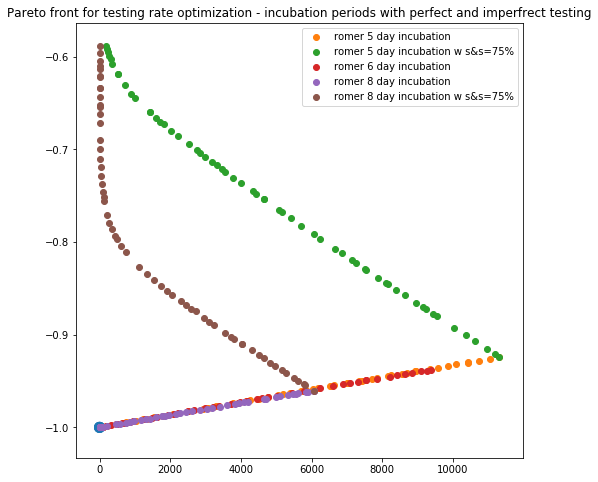

In [106]:

run_obj_df_bc = pd.read_csv('results/romer_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer = pd.read_csv('active_results/romer_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer075 = pd.read_csv('active_results/romer_sens_spec_075_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer_6incu = pd.read_csv('active_results/romer_6d_incubation_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer_8incu = pd.read_csv('active_results/romer_8d_incubation_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer_8incu_ss75 = pd.read_csv('active_results/romer_8d_incubation_sens_spec_075_objectives.csv', delimiter=',').to_numpy()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(run_obj_df_bc[:,0], run_obj_df_bc[:,1], run_obj_df_bc[:,2])
plt.scatter(run_obj_df_romer[:,0], run_obj_df_romer[:,1], label="romer 5 day incubation")
plt.scatter(run_obj_df_romer075[:,0], run_obj_df_romer075[:,1], label="romer 5 day incubation w s&s=75%")
plt.scatter(run_obj_df_romer_6incu[:,0], run_obj_df_romer_6incu[:,1], label="romer 6 day incubation")
plt.scatter(run_obj_df_romer_8incu[:,0], run_obj_df_romer_8incu[:,1], label="romer 8 day incubation")
plt.scatter(run_obj_df_romer_8incu_ss75[:,0], run_obj_df_romer_8incu_ss75[:,1], label="romer 8 day incubation w s&s=75%")

plt.legend()
plt.title("Pareto front for testing rate optimization - incubation periods with perfect and imperfrect testing")
plt.savefig("results/romer_incubation_pareto.png", dpi=150)
plt.show()


Indices for solve_case return values ('D' suffix  = Daily):
0: Reported_D,   
1: Notinfected_D,   
2: Unreported_D,   
3: Infected_D,   
4: False_pos (daily),   
5: False_neg (daily),   
6: Recovered_D,   
7: Dead_D,   
8: Infected_T (time step),   
9: Infected_not_Q,   
10: Infected_in_Q,   
11: Y_D,   
12: M_t,   
13: Y_total,   
14: total_cost
15: tests
16: Unknown, not infected, asymptomatic, not quarantined
17: Unknown, not infected, asymptomatic, quarantined
18: Known, not infected, asymptomatic, not quarantined
19: Known, not infected, asymptomatic, quarantined



No handles with labels found to put in legend.


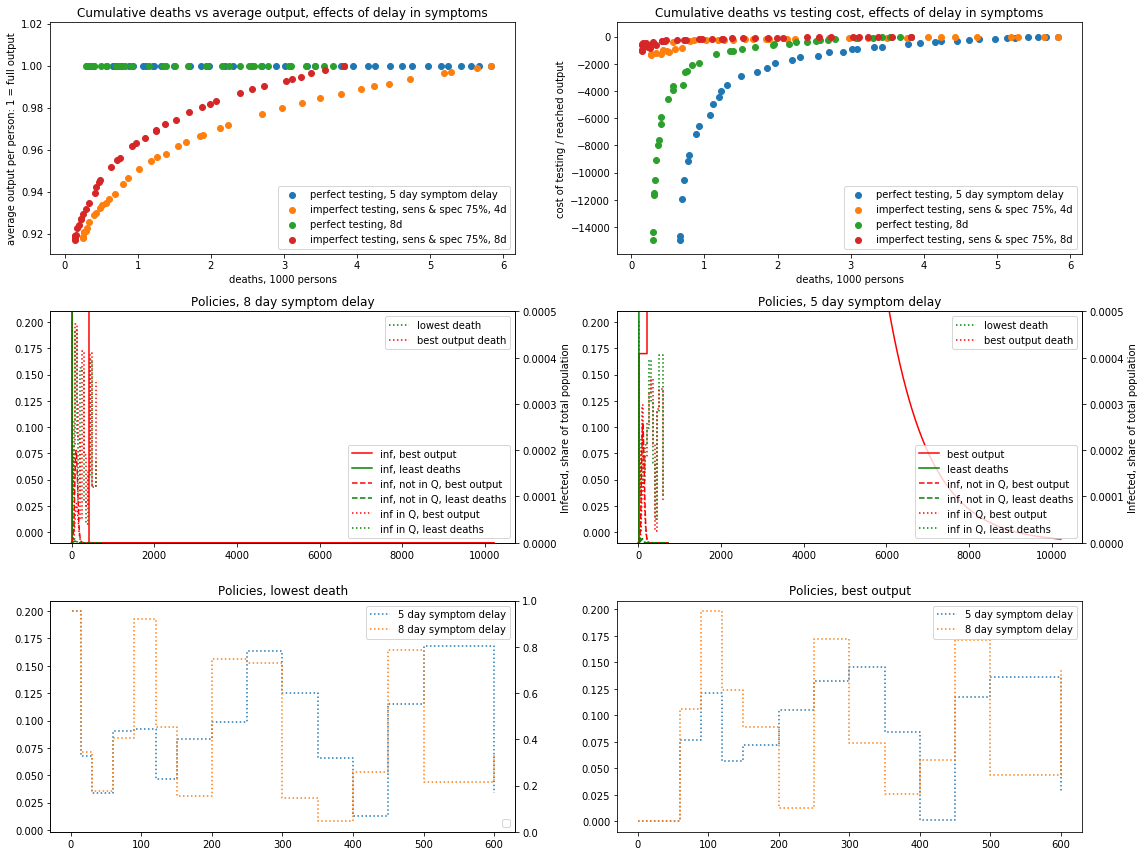

In [15]:
#run_obj_df_bc = pd.read_csv('results/romer_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer = pd.read_csv('active_results/romer_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer075 = pd.read_csv('active_results/romer_sens_spec_075_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer_6incu = pd.read_csv('active_results/romer_6d_incubation_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer_8incu = pd.read_csv('active_results/romer_8d_incubation_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer_8incu_ss75 = pd.read_csv('active_results/romer_8d_incubation_sens_spec_075_objectives.csv', delimiter=',').to_numpy()


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,12))
axes[0,0].scatter(run_obj_df_romer[:,0], -1*run_obj_df_romer[:,1], label='perfect testing, 5 day symptom delay'),
axes[0,0].scatter(run_obj_df_romer075[:,0], -1*run_obj_df_romer075[:,1], label='imperfect testing, sens & spec 75%, 4d')
axes[0,0].scatter(run_obj_df_romer_8incu[:,0], -1*run_obj_df_romer_8incu[:,1], label='perfect testing, 8d')
axes[0,0].scatter(run_obj_df_romer_8incu_ss75[:,0], -1*run_obj_df_romer_8incu_ss75[:,1], label='imperfect testing, sens & spec 75%, 8d')
axes[0,0].set_title('Cumulative deaths vs average output, effects of delay in symptoms')
axes[0,0].set_xlabel('deaths, 1000 persons')
axes[0,0].set_ylabel('average output per person: 1 = full output')
#axes[0,0].set_xlim(0,600)
#axes[0,0].set_ylim(0.975, 1.00)
axes[0,0].legend()

axes[0,1].scatter(run_obj_df_romer[:,0], -1*run_obj_df_romer[:,2], label='perfect testing, 5 day symptom delay'),
axes[0,1].scatter(run_obj_df_romer075[:,0], -1*run_obj_df_romer075[:,2], label='imperfect testing, sens & spec 75%, 4d')
axes[0,1].scatter(run_obj_df_romer_8incu[:,0], -1*run_obj_df_romer_8incu[:,2], label='perfect testing, 8d')
axes[0,1].scatter(run_obj_df_romer_8incu_ss75[:,0], -1*run_obj_df_romer_8incu_ss75[:,2], label='imperfect testing, sens & spec 75%, 8d')
axes[0,1].set_title('Cumulative deaths vs testing cost, effects of delay in symptoms')

axes[0,1].set_xlabel('deaths, 1000 persons')
axes[0,1].set_ylabel('cost of testing / reached output')
#axes[0,1].set_xlim(0,600)
#axes[0,1].set_ylim(60,140)
axes[0,1].legend()

axes[1,0].set_title('Policies, 8 day symptom delay')
axes[1,0].step(policy_controls['romer_8d_incubation_sens_spec_075'].testing_policy_control_days, lowest_deaths_policy['romer_8d_incubation_sens_spec_075'][1:len(lowest_deaths_policy['romer_8d_incubation_sens_spec_075'])], ':', color='green', where='post', label='lowest death'),
axes[1,0].step(policy_controls['romer_8d_incubation_sens_spec_075'].testing_policy_control_days, best_output_policy['romer_8d_incubation_sens_spec_075'][1:len(best_output_policy['romer_8d_incubation_sens_spec_075'])], ':', color='red', where='post', label='best output death'),

secaxy10 = axes[1,0].twinx()
secaxy10.plot(best_output_run_data['romer_8d_incubation_sens_spec_075'][3], color='red', label='inf, best output')
secaxy10.plot(lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][3], color='green', label='inf, least deaths')
secaxy10.plot(best_output_run_data['romer_8d_incubation_sens_spec_075'][9], '--', color='red', label='inf, not in Q, best output')
secaxy10.plot(lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][9], '--', color='green', label='inf, not in Q, least deaths')
secaxy10.plot(best_output_run_data['romer_8d_incubation_sens_spec_075'][10], ':', color='red', label='inf in Q, best output')
secaxy10.plot(lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][10], ':', color='green', label='inf in Q, least deaths')
#secaxy10.plot(best_output_run_data['romer_8d_incubation_sens_spec_075'][4], '--', color='magenta', label='false +, best output')
#secaxy10.plot(lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][4], '--', color='cyan', label='false +, least deaths')
#secaxy10.plot(best_output_run_data['romer_8d_incubation_sens_spec_075'][5], ':', color='magenta', label='false -, best output')
#secaxy10.plot(lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][5], ':', color='cyan', label='false -, least deaths')

secaxy10.set_ylim(0.0, 0.0005)
secaxy10.set_ylabel('Infected, share of total population')
axes[1,0].legend(loc='upper right')
secaxy10.legend(loc='lower right')

axes[1,1].set_title('Policies, 5 day symptom delay')
axes[1,1].step(policy_controls['romer_sens_spec_075'].testing_policy_control_days, lowest_deaths_policy['romer_sens_spec_075'][1:len(lowest_deaths_policy['romer_sens_spec_075'])], ':', color='green', where='post', label='lowest death'),
axes[1,1].step(policy_controls['romer_sens_spec_075'].testing_policy_control_days, best_output_policy['romer_sens_spec_075'][1:len(best_output_policy['romer_sens_spec_075'])], ':', color='red', where='post', label='best output death'),

secaxy11 = axes[1,1].twinx()
secaxy11.plot(best_output_run_data['romer_sens_spec_075'][3], color='red', label='best output')
secaxy11.plot(lowest_deaths_run_data['romer_sens_spec_075'][3], color='green', label='least deaths')
secaxy11.plot(best_output_run_data['romer_sens_spec_075'][9], '--', color='red', label='inf, not in Q, best output')
secaxy11.plot(lowest_deaths_run_data['romer_sens_spec_075'][9], '--', color='green', label='inf, not in Q, least deaths')
secaxy11.plot(best_output_run_data['romer_sens_spec_075'][10], ':', color='red', label='inf in Q, best output')
secaxy11.plot(lowest_deaths_run_data['romer_sens_spec_075'][10], ':', color='green', label='inf in Q, least deaths')
#secaxy11.plot(best_output_run_data['romer_sens_spec_075'][4], '--', color='magenta', label='false +, best output')
#secaxy11.plot(lowest_deaths_run_data['romer_sens_spec_075'][4], '--', color='cyan', label='false +, least deaths')
#secaxy11.plot(best_output_run_data['romer_sens_spec_075'][5], ':', color='magenta', label='false -, best output')
#secaxy11.plot(lowest_deaths_run_data['romer_sens_spec_075'][5], ':', color='cyan', label='false -, least deaths')
secaxy11.set_ylim(0.0, 0.0005)
secaxy11.set_ylabel('Infected, share of total population')
#secaxy11.legend(loc='lower right')
axes[1,1].legend(loc='upper right')
secaxy11.legend(loc='lower right')

axes[2,0].set_title('Policies, lowest death')
axes[2,0].step(policy_controls['romer_sens_spec_075'].testing_policy_control_days, lowest_deaths_policy['romer_sens_spec_075'][1:len(lowest_deaths_policy['romer_sens_spec_075'])], ':', where='post', label='5 day symptom delay'),
axes[2,0].step(policy_controls['romer_8d_incubation_sens_spec_075'].testing_policy_control_days, lowest_deaths_policy['romer_8d_incubation_sens_spec_075'][1:len(lowest_deaths_policy['romer_8d_incubation_sens_spec_075'])], ':', where='post', label='8 day symptom delay'),
secaxy20 = axes[2,0].twinx()
#secaxy20.plot(lowest_deaths_run_data['romer_sens_spec_075'][4], '--', color='blue', label='false +, 5 day asympt.')
#secaxy20.plot(lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][4], 'orange', color='cyan', label='false +, 8 day asympt.')
axes[2,0].legend()
secaxy20.legend(loc='lower right')

axes[2,1].set_title('Policies, best output')
axes[2,1].step(policy_controls['romer_sens_spec_075'].testing_policy_control_days, best_output_policy['romer_sens_spec_075'][1:len(best_output_policy['romer_sens_spec_075'])], ':', where='post', label='5 day symptom delay'),
axes[2,1].step(policy_controls['romer_8d_incubation_sens_spec_075'].testing_policy_control_days, best_output_policy['romer_8d_incubation_sens_spec_075'][1:len(best_output_policy['romer_8d_incubation_sens_spec_075'])], ':', where='post', label='8 day symptom delay'),
axes[2,1].legend()
fig.tight_layout()
#fig.savefig("active_results/romer_pareto_imp_testing_R0_4.png", dpi=150)


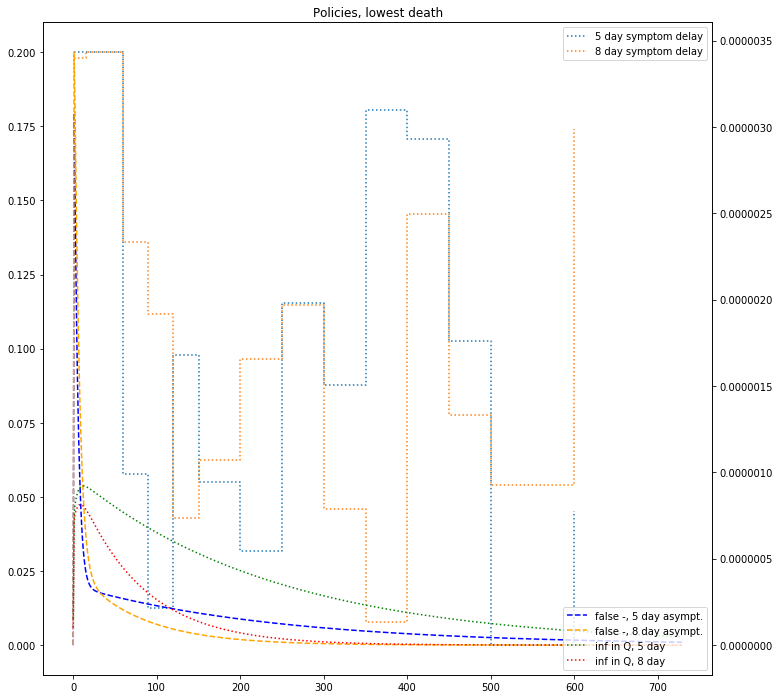

In [20]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_title('Policies, lowest death')
axes.step(policy_controls['romer_sens_spec_075'].testing_policy_control_days, lowest_deaths_policy['romer_sens_spec_075'][1:len(lowest_deaths_policy['romer_sens_spec_075'])], ':', where='post', label='5 day symptom delay'),
axes.step(policy_controls['romer_8d_incubation_sens_spec_075'].testing_policy_control_days, lowest_deaths_policy['romer_8d_incubation_sens_spec_075'][1:len(lowest_deaths_policy['romer_8d_incubation_sens_spec_075'])], ':', where='post', label='8 day symptom delay'),
secaxy20 = axes.twinx()
secaxy20.plot(20*lowest_deaths_run_data['romer_sens_spec_075'][5], '--', color='blue', label='false -, 5 day asympt.')
secaxy20.plot(20*lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][5], '--', color='orange', label='false -, 8 day asympt.')
#secaxy20.plot(10*lowest_deaths_run_data['romer_sens_spec_075'][5], ':', color='blue', label='false -, 5 day asympt.')
#secaxy20.plot(10*lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][5], ':', color='orange', label='false -, 8 day asympt.')
secaxy20.plot(lowest_deaths_run_data['romer_sens_spec_075'][10], ':', color='green', label='inf in Q, 5 day')
secaxy20.plot(lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][10], ':', color='red', label='inf in Q, 8 day')
axes.legend()
secaxy20.legend(loc='lower right')

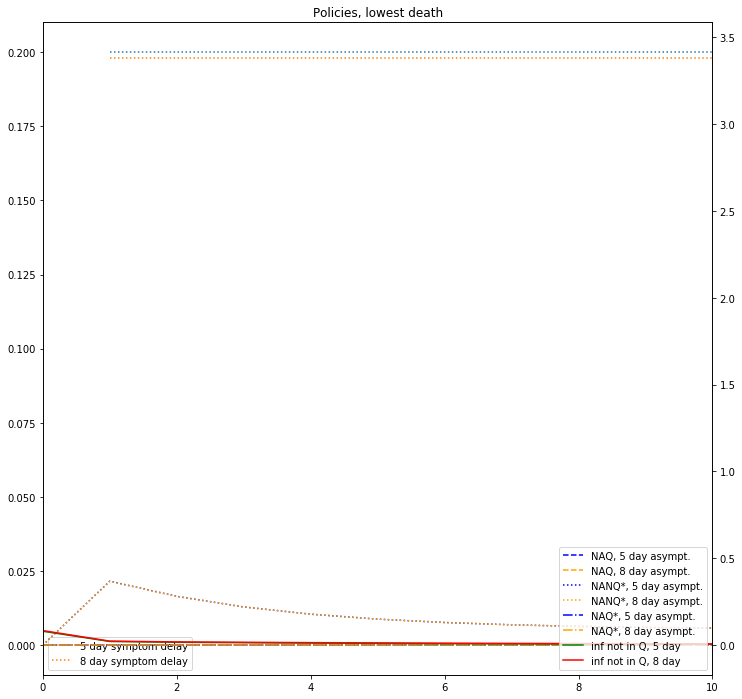

In [118]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_title('Policies, lowest death')
axes.step(policy_controls['romer_sens_spec_075'].testing_policy_control_days, lowest_deaths_policy['romer_sens_spec_075'][1:len(lowest_deaths_policy['romer_sens_spec_075'])], ':', where='post', label='5 day symptom delay'),
axes.step(policy_controls['romer_8d_incubation_sens_spec_075'].testing_policy_control_days, lowest_deaths_policy['romer_8d_incubation_sens_spec_075'][1:len(lowest_deaths_policy['romer_8d_incubation_sens_spec_075'])], ':', where='post', label='8 day symptom delay'),
secaxy20 = axes.twinx()
#secaxy20.plot(lowest_deaths_run_data['romer_sens_spec_075'][16], '-', color='blue', label='NANQ, 5 day asympt.')
#secaxy20.plot(lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][16], '-', color='orange', label='NANQ, 8 day asympt.')

secaxy20.plot(lowest_deaths_run_data['romer_sens_spec_075'][17], '--', color='blue', label='NAQ, 5 day asympt.')
secaxy20.plot(lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][17], '--', color='orange', label='NAQ, 8 day asympt.')


secaxy20.plot(lowest_deaths_run_data['romer_sens_spec_075'][18], ':', color='blue', label='NANQ*, 5 day asympt.')
secaxy20.plot(lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][18], ':', color='orange', label='NANQ*, 8 day asympt.')

secaxy20.plot(lowest_deaths_run_data['romer_sens_spec_075'][19], '-.', color='blue', label='NAQ*, 5 day asympt.')
secaxy20.plot(lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][19], '-.', color='orange', label='NAQ*, 8 day asympt.')


#secaxy20.plot(10*lowest_deaths_run_data['romer_sens_spec_075'][5], ':', color='blue', label='false -, 5 day asympt.')
#secaxy20.plot(10*lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][5], ':', color='orange', label='false -, 8 day asympt.')
secaxy20.plot(100000*lowest_deaths_run_data['romer_sens_spec_075'][9], '-', color='green', label='inf not in Q, 5 day')
secaxy20.plot(100000*lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][9], '-', color='red', label='inf not in Q, 8 day')
#secaxy20.set_ylim(0.0, 0.05)
secaxy20.set_xlim(0.0, 10)
axes.legend()
secaxy20.legend(loc='lower right')

In [30]:
FPsum4d = sum(1-lowest_deaths_run_data['romer_sens_spec_075'][5])
FPsum8d = sum(1-lowest_deaths_run_data['romer_8d_incubation_sens_spec_075'][5])
print("5 day total FP results: ", FPsum4d, " vs. ", FPsum8d, "8 day total FP results")

5 day total FP results:  729.9999943826397  vs.  729.9999949794667 8 day total FP results


### Notes on incubation (symptom development delay period)

As testing can also capture non-symptomatic cases, there's little difference between delayed symptoms with perfecte testing. However, with iimperfect testing, some differences arise(?). 

**WHY?? (Still thinking...)**: 
larger delta param decreases the transition rate from asymptomatic states to symptomatic states. This means that in effect, those who die, die later and are able to contribute to output for longer before that (by staying in asymptomatic, unknown infected state). 

One possible explanation could be, that with 5 day asymptomatic period, the pool of asymptomatic, i.e. testable persons get smaller faster. This in turn means that, with imperfect specificity, less healthy people end up quarantined, and this increases the spread of the epidemic.(?)

One note: The reason why later testing levels are high is probably due to most people already being dead, recovered or... Hmm.. It looks like testing rate at later times doesn't mean much -> maybe the compartments from which tests are made are empty.

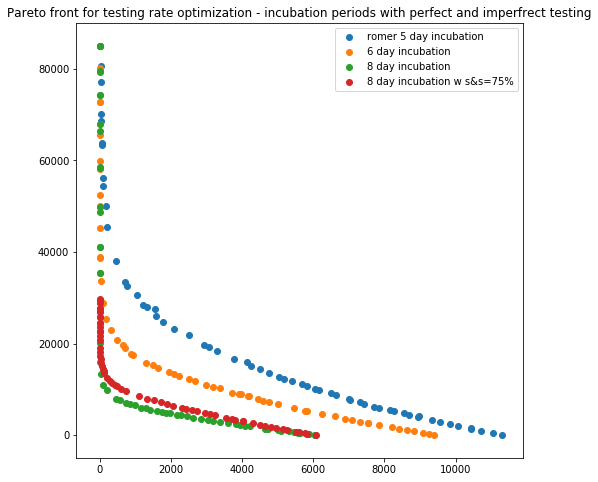

In [125]:

#run_obj_df_bc = pd.read_csv('results/romer_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer = pd.read_csv('active_results/romer_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer_6incu = pd.read_csv('active_results/romer_6d_incubation_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer_8incu = pd.read_csv('active_results/romer_8d_incubation_objectives.csv', delimiter=',').to_numpy()
run_obj_df_romer_8incu_ss75 = pd.read_csv('active_results/romer_8d_incubation_sens_spec_075_objectives.csv', delimiter=',').to_numpy()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#ax.scatter(run_obj_df_bc[:,0], run_obj_df_bc[:,1], run_obj_df_bc[:,2])
plt.scatter(run_obj_df_romer[:,0], run_obj_df_romer[:,2])
plt.scatter(run_obj_df_romer_6incu[:,0], run_obj_df_romer_6incu[:,2])
plt.scatter(run_obj_df_romer_8incu[:,0], run_obj_df_romer_8incu[:,2])
plt.scatter(run_obj_df_romer_8incu_ss75[:,0], run_obj_df_romer_8incu_ss75[:,2])

plt.legend(['romer 5 day incubation', '6 day incubation', '8 day incubation', '8 day incubation w s&s=75%'])
plt.title("Pareto front for testing rate optimization - incubation periods with perfect and imperfrect testing")
plt.savefig("results/romer_incubation_pareto.png", dpi=150)
plt.show()


time stteps size:  range(0, 730)


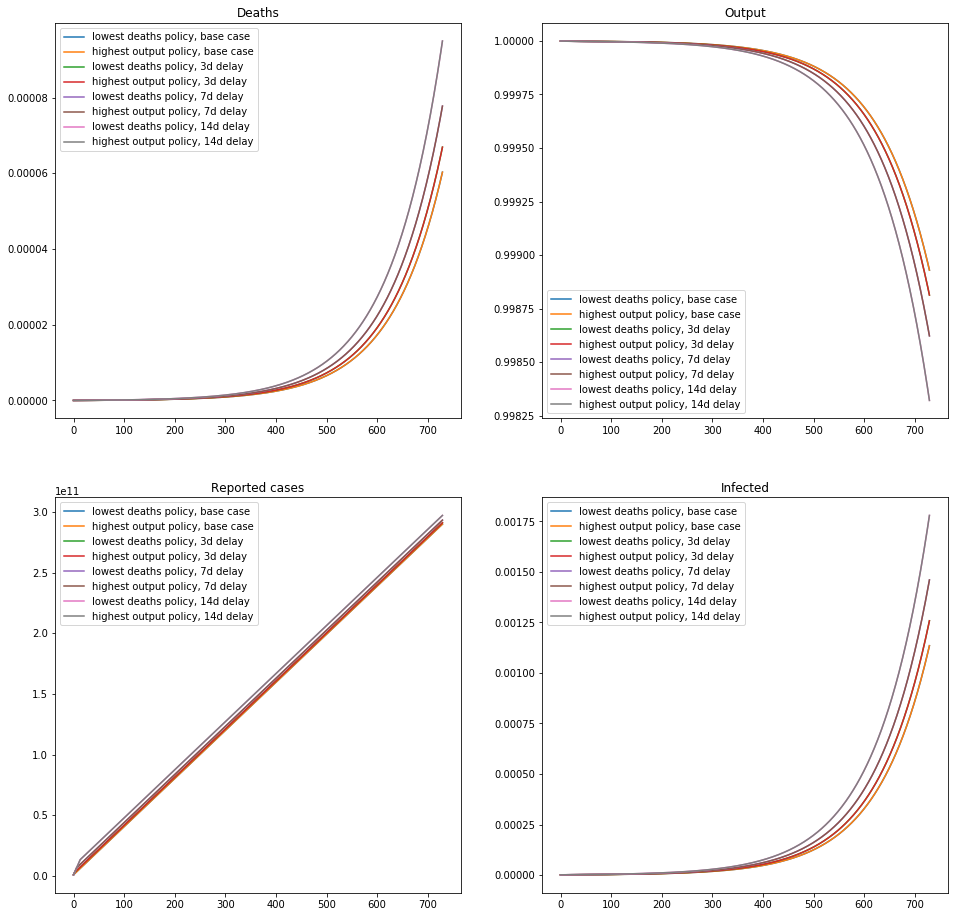

In [129]:
# EFFECTS OF DELAY on ROMER CASE

time_steps = range(0, epidemic_simulators['romer'][0].T_years*365)
print("time stteps size: ", time_steps)

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.plot(time_steps, lowest_deaths_run_data['romer'][7])
plt.plot(time_steps, best_output_run_data['romer'][7])
plt.plot(time_steps, lowest_deaths_run_data['romer_3d_delay'][7])
plt.plot(time_steps, best_output_run_data['romer_3d_delay'][7])
plt.plot(time_steps, lowest_deaths_run_data['romer_7d_delay'][7])
plt.plot(time_steps, best_output_run_data['romer_7d_delay'][7])
plt.plot(time_steps, lowest_deaths_run_data['romer_14d_delay'][7])
plt.plot(time_steps, best_output_run_data['romer_14d_delay'][7])
plt.title("Deaths")
plt.legend(['lowest deaths policy, base case', 'highest output policy, base case', 'lowest deaths policy, 3d delay', 'highest output policy, 3d delay', 'lowest deaths policy, 7d delay', 'highest output policy, 7d delay', 'lowest deaths policy, 14d delay', 'highest output policy, 14d delay' ])

plt.subplot(222)
plt.plot(time_steps, lowest_deaths_run_data['romer'][11])
plt.plot(time_steps, best_output_run_data['romer'][11])
plt.plot(time_steps, lowest_deaths_run_data['romer_3d_delay'][11])
plt.plot(time_steps, best_output_run_data['romer_3d_delay'][11])
plt.plot(time_steps, lowest_deaths_run_data['romer_7d_delay'][11])
plt.plot(time_steps, best_output_run_data['romer_7d_delay'][11])
plt.plot(time_steps, lowest_deaths_run_data['romer_14d_delay'][11])
plt.plot(time_steps, best_output_run_data['romer_14d_delay'][11])
plt.title("Output")
plt.legend(['lowest deaths policy, base case', 'highest output policy, base case', 'lowest deaths policy, 3d delay', 'highest output policy, 3d delay', 'lowest deaths policy, 7d delay', 'highest output policy, 7d delay', 'lowest deaths policy, 14d delay', 'highest output policy, 14d delay' ])

plt.subplot(223)
plt.plot(time_steps, lowest_deaths_run_data['romer'][0])
plt.plot(time_steps, best_output_run_data['romer'][0])
plt.plot(time_steps, lowest_deaths_run_data['romer_3d_delay'][0])
plt.plot(time_steps, best_output_run_data['romer_3d_delay'][0])
plt.plot(time_steps, lowest_deaths_run_data['romer_7d_delay'][0])
plt.plot(time_steps, best_output_run_data['romer_7d_delay'][0])
plt.plot(time_steps, lowest_deaths_run_data['romer_14d_delay'][0])
plt.plot(time_steps, best_output_run_data['romer_14d_delay'][0])
plt.title("Reported cases")
plt.legend(['lowest deaths policy, base case', 'highest output policy, base case', 'lowest deaths policy, 3d delay', 'highest output policy, 3d delay', 'lowest deaths policy, 7d delay', 'highest output policy, 7d delay', 'lowest deaths policy, 14d delay', 'highest output policy, 14d delay' ])

plt.subplot(224)
plt.plot(time_steps, lowest_deaths_run_data['romer'][3])
plt.plot(time_steps, best_output_run_data['romer'][3])
plt.plot(time_steps, lowest_deaths_run_data['romer_3d_delay'][3])
plt.plot(time_steps, best_output_run_data['romer_3d_delay'][3])
plt.plot(time_steps, lowest_deaths_run_data['romer_7d_delay'][3])
plt.plot(time_steps, best_output_run_data['romer_7d_delay'][3])
plt.plot(time_steps, lowest_deaths_run_data['romer_14d_delay'][3])
plt.plot(time_steps, best_output_run_data['romer_14d_delay'][3])
plt.title("Infected")
plt.legend(['lowest deaths policy, base case', 'highest output policy, base case', 'lowest deaths policy, 3d delay', 'highest output policy, 3d delay', 'lowest deaths policy, 7d delay', 'highest output policy, 7d delay', 'lowest deaths policy, 14d delay', 'highest output policy, 14d delay' ])


#plt.tight_layout()
plt.show()

### Analysis on effects of imperfect testing in Romer case

With perfect testing the optimal solution converges approximately towards a single point. Lowering testing rate could lower costs, but at the same time this would risk more deaths and lower the saved output. On the other hand, with a certain profile, the more testing will do little good, but would generate more costs. 

With imperfect testing, more tests will lead to false positives and false negatives, which will then create tradeoffs. A great number of false positives will lead to reduced output. Thus, increasing testing in a low infectious population situation, will lower deaths but increase the number of people in quarantine without good reason. However, when the population contains many infected persons, the benefits are clear.

How low deaths can be pushed just by testing is dependent on the true positive rate, i.e. sensitivity. If the test has <1.0 sensitivity, some subjects will always gett false negative results, and end up spreading the disease without anybody knowing about it.

----

## Lockdown optimization

### Effects of limited fixed testing rates on lockdown policies and effects


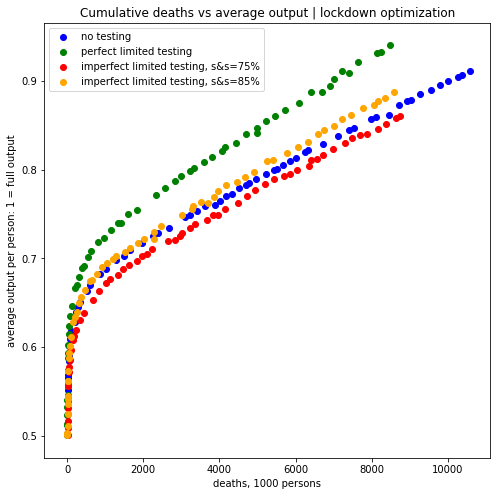

In [26]:
### BASE CASE PARETO
%matplotlib inline
run_obj_df_bc_nt = pd.read_csv('active_results/base_case_lockdown_opt_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_lpt = pd.read_csv('active_results/base_case_lockdown_opt_with_limited_general_testing_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_lipt = pd.read_csv('active_results/base_case_lockdown_opt_with_limited_imperfect(0.75)_general_testing_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_lipt85 = pd.read_csv('active_results/base_case_lockdown_opt_with_limited_imperfect(0.85)_general_testing_objectives.csv', delimiter=',').to_numpy()

fig, axes = plt.subplots(figsize=(8,8))
axes.scatter(run_obj_df_bc_nt[:,0], -1*run_obj_df_bc_nt[:,1], label='no testing', color='blue'),
axes.scatter(run_obj_df_bc_lpt[:,0], -1*run_obj_df_bc_lpt[:,1], label='perfect limited testing', color='green')
axes.scatter(run_obj_df_bc_lipt[:,0], -1*run_obj_df_bc_lipt[:,1], label='imperfect limited testing, s&s=75%', color='red')
axes.scatter(run_obj_df_bc_lipt85[:,0], -1*run_obj_df_bc_lipt85[:,1], label='imperfect limited testing, s&s=85%', color='orange')
axes.set_title('Cumulative deaths vs average output | lockdown optimization')
axes.set_xlabel('deaths, 1000 persons')
axes.set_ylabel('average output per person: 1 = full output')
#axes.set_xlim(0,600)
#axes.set_ylim(0.8, 1.00)
axes.legend()

fig.savefig("active_results/base_case_effects_of_testing.png", dpi=150)


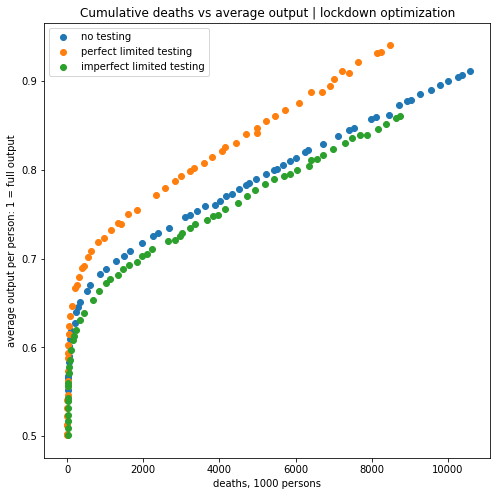

In [21]:
### BASE CASE PARETO
%matplotlib inline
run_obj_df_bc_nt = pd.read_csv('active_results/base_case_lockdown_opt_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_lpt = pd.read_csv('active_results/base_case_lockdown_opt_with_limited_general_testing_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_lipt = pd.read_csv('active_results/base_case_lockdown_opt_with_limited_imperfect(0.75)_general_testing_objectives.csv', delimiter=',').to_numpy()
run_obj_df_bc_lipt85 = pd.read_csv('active_results/base_case_lockdown_opt_with_limited_imperfect(0.85)_general_testing_objectives.csv', delimiter=',').to_numpy()

fig, axes = plt.subplots(figsize=(8,8))
axes.scatter(run_obj_df_bc_nt[:,0], -1*run_obj_df_bc_nt[:,1], label='no testing'),
axes.scatter(run_obj_df_bc_lpt[:,0], -1*run_obj_df_bc_lpt[:,1], label='perfect limited testing')
axes.scatter(run_obj_df_bc_lipt[:,0], -1*run_obj_df_bc_lipt[:,1], label='imperfect limited testing')
#axes.scatter(run_obj_df_bc_lipt85[:,0], -1*run_obj_df_bc_lipt85[:,1], label='imperfect limited testing')
axes.set_title('Cumulative deaths vs average output | lockdown optimization')
axes.set_xlabel('deaths, 1000 persons')
axes.set_ylabel('average output per person: 1 = full output')
#axes.set_xlim(0,600)
#axes.set_ylim(0.8, 1.00)
axes.legend()

#fig.savefig("figures/base_case_effects_of_testing.png", dpi=150)


## Notes on lockdown optimization with different testing:

* looks like No testing is worse than perfect testing (makes sense) **BUT** imperfect testing lower the effectiveness of lockdown(!). This might be due to false negatives.

### Effects of delay between infection and symptoms:

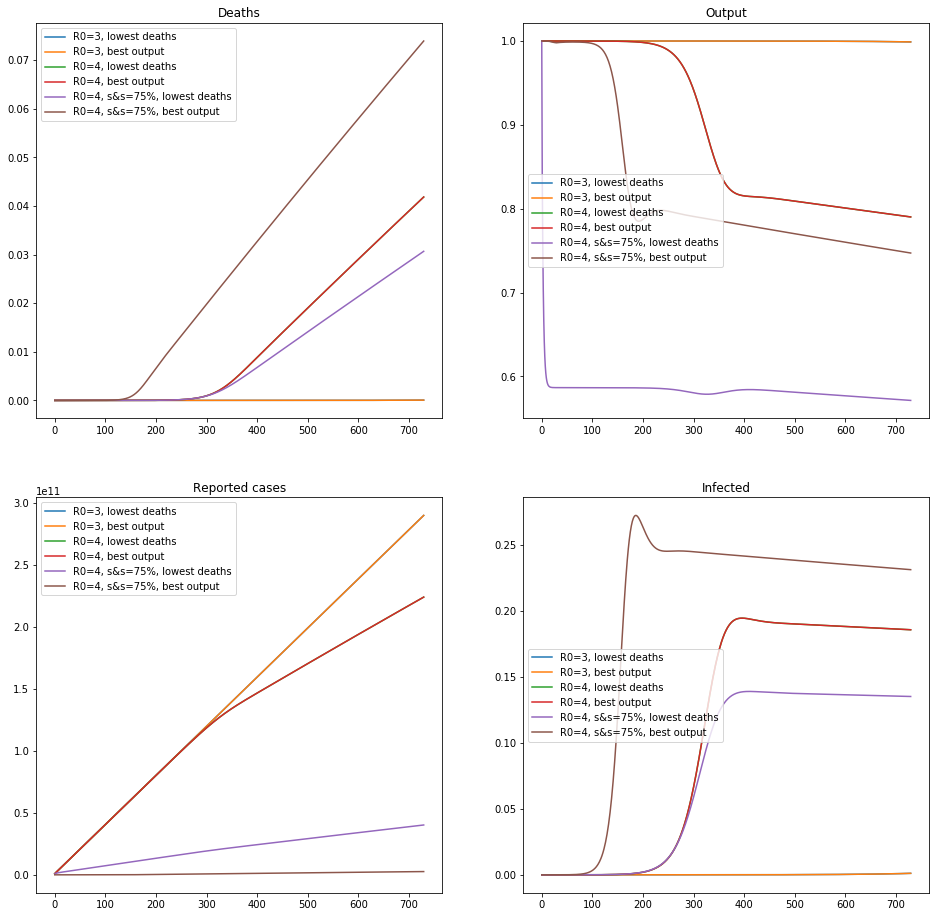

In [134]:
# EFFECTS OF R0 on ROMER CASE

plt.figure(figsize=(16,16))
'romer_R0_4.0_sens_spec_075'
plt.subplot(221)
plt.plot(time_steps, lowest_deaths_run_data['romer'][7], label="R0=3, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer'][7], label="R0=3, best output")
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][7], label="R0=4, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][7], label="R0=4, best output")
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][7], label="R0=4, s&s=75%, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][7], label="R0=4, s&s=75%, best output")
plt.title("Deaths")
plt.legend()

plt.subplot(222)
plt.plot(time_steps, lowest_deaths_run_data['romer'][11], label="R0=3, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer'][11], label="R0=3, best output")
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][11], label="R0=4, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][11], label="R0=4, best output")
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][11], label="R0=4, s&s=75%, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][11], label="R0=4, s&s=75%, best output")
plt.title("Output")
plt.legend()

plt.subplot(223)
plt.plot(time_steps, lowest_deaths_run_data['romer'][0], label="R0=3, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer'][0], label="R0=3, best output")
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][0], label="R0=4, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][0], label="R0=4, best output")
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][0], label="R0=4, s&s=75%, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][0], label="R0=4, s&s=75%, best output")
plt.title("Reported cases")
plt.legend()

plt.subplot(224)
plt.plot(time_steps, lowest_deaths_run_data['romer'][3], label="R0=3, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer'][3], label="R0=3, best output")
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][3], label="R0=4, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][3], label="R0=4, best output")
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][3], label="R0=4, s&s=75%, lowest deaths")
plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][3], label="R0=4, s&s=75%, best output")
plt.title("Infected")
plt.legend()


#plt.tight_layout()
plt.show()

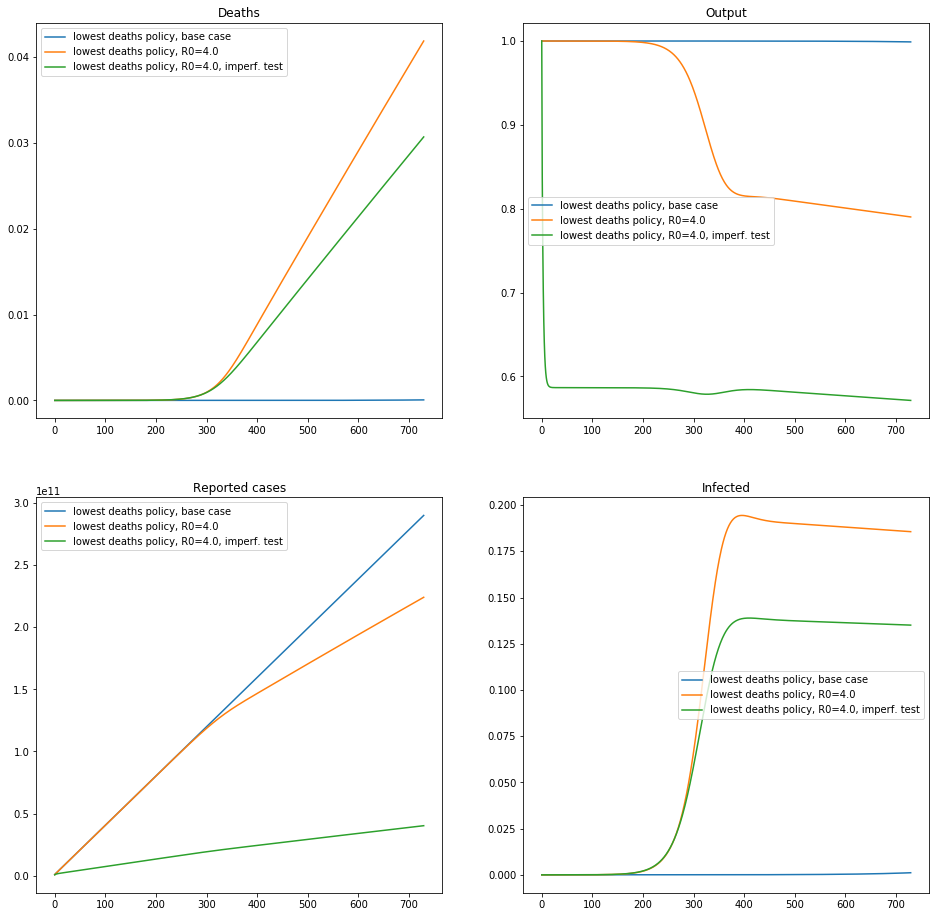

In [135]:
# EFFECTS OF R0 on ROMER CASE

plt.figure(figsize=(16,16))
'romer_R0_4.0_sens_spec_075'
plt.subplot(221)
plt.plot(time_steps, lowest_deaths_run_data['romer'][7])
#plt.plot(time_steps, best_output_run_data['romer'][7])
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][7])
#plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][7])
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][7])
#plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][7])
plt.title("Deaths")
plt.legend(['lowest deaths policy, base case', 'lowest deaths policy, R0=4.0', 'lowest deaths policy, R0=4.0, imperf. test'])

plt.subplot(222)
plt.plot(time_steps, lowest_deaths_run_data['romer'][11])
#plt.plot(time_steps, best_output_run_data['romer'][11])
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][11])
#plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][11])
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][11])
#plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][11])
plt.title("Output")
plt.legend(['lowest deaths policy, base case', 'lowest deaths policy, R0=4.0', 'lowest deaths policy, R0=4.0, imperf. test'])

plt.subplot(223)
plt.plot(time_steps, lowest_deaths_run_data['romer'][0])
#plt.plot(time_steps, best_output_run_data['romer'][0])
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][0])
#plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][0])
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][0])
#plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][0])
plt.title("Reported cases")
plt.legend(['lowest deaths policy, base case', 'lowest deaths policy, R0=4.0', 'lowest deaths policy, R0=4.0, imperf. test'])

plt.subplot(224)
plt.plot(time_steps, lowest_deaths_run_data['romer'][3])
#plt.plot(time_steps, best_output_run_data['romer'][3])
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][3])
#plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][3])
plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][3])
#plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][3])
plt.title("Infected")
#plt.legend(['lowest deaths policy, base case', 'highest output policy, base case', 'lowest deaths policy, R0=4.0', 'highest output policy, R0=4.0', 'lowest deaths policy, R0=4.0, imperf. test', 'highest output policy, R0=4.0, imperf. test' ])
plt.legend(['lowest deaths policy, base case', 'lowest deaths policy, R0=4.0', 'lowest deaths policy, R0=4.0, imperf. test'])


#plt.tight_layout()
plt.show()

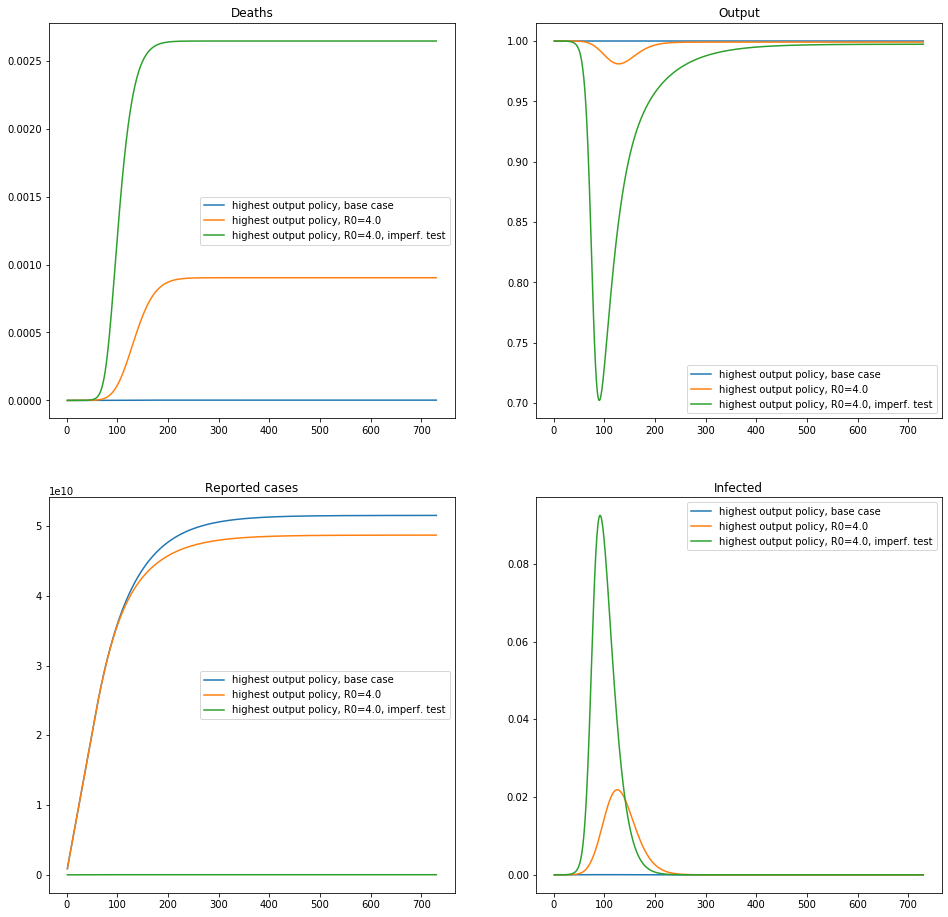

In [24]:
# EFFECTS OF R0 on ROMER CASE

plt.figure(figsize=(16,16))
'romer_R0_4.0_sens_spec_075'
plt.subplot(221)
#plt.plot(time_steps, lowest_deaths_run_data['romer'][7])
plt.plot(time_steps, best_output_run_data['romer'][7])
#plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][7])
plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][7])
#plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][7])
plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][7])
plt.title("Deaths")
plt.legend(['highest output policy, base case', 'highest output policy, R0=4.0', 'highest output policy, R0=4.0, imperf. test' ])

plt.subplot(222)
#plt.plot(time_steps, lowest_deaths_run_data['romer'][11])
plt.plot(time_steps, best_output_run_data['romer'][11])
#plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][11])
plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][11])
#plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][11])
plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][11])
plt.title("Output")
plt.legend(['highest output policy, base case', 'highest output policy, R0=4.0', 'highest output policy, R0=4.0, imperf. test' ])

plt.subplot(223)
#plt.plot(time_steps, lowest_deaths_run_data['romer'][0])
plt.plot(time_steps, best_output_run_data['romer'][0])
#plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][0])
plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][0])
#plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][0])
plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][0])
plt.title("Reported cases")
plt.legend(['highest output policy, base case', 'highest output policy, R0=4.0', 'highest output policy, R0=4.0, imperf. test' ])

plt.subplot(224)
#plt.plot(time_steps, lowest_deaths_run_data['romer'][3])
plt.plot(time_steps, best_output_run_data['romer'][3])
#plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0'][3])
plt.plot(time_steps, best_output_run_data['romer_R0_4.0'][3])
#plt.plot(time_steps, lowest_deaths_run_data['romer_R0_4.0_sens_spec_075'][3])
plt.plot(time_steps, best_output_run_data['romer_R0_4.0_sens_spec_075'][3])
plt.title("Infected")
plt.legend(['highest output policy, base case', 'highest output policy, R0=4.0', 'highest output policy, R0=4.0, imperf. test' ])


#plt.tight_layout()
plt.show()

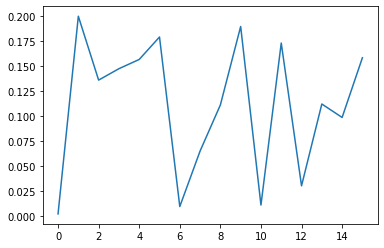

In [59]:
plt.figure()
plt.plot(best_output_policy['romer'])